In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv(r'C:\Users\user\Documents\python\round2\clean_dataset.csv')

# df = pd.read_csv(r'C:\Users\user\Documents\python\round2\Bảng ĐH_Vòng 2_DSTC 2024_Dataset\01_dataset.csv')


In [17]:
# from sklearn.impute import SimpleImputer 
# credit_data = df
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(credit_data)
# imputed_credit_data = imputer.transform(credit_data)
# imputed_credit_data = pd.DataFrame(imputed_credit_data, columns=credit_data.columns)
# imputed_credit_data.head(10)
# df= imputed_credit_data


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# from sklearn.impute import SimpleImputer 
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(df)
# imputed_credit_data = imputer.transform(df)
# imputed_credit_data = pd.DataFrame(imputed_credit_data, columns=df.columns)
# df=imputed_credit_data


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [19]:
X = df.iloc[:, 2:]
y = df['label']

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=10)  
# X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Tổng phương sai được giải thích:", explained_variance.sum())


Tổng phương sai được giải thích: 0.9404894564706963


In [20]:
print(pca.explained_variance_ratio_)


[0.20411275 0.11007799 0.07467391 0.05980268 0.05392138 0.04868331
 0.03542645 0.03215857 0.02351974 0.02309675 0.02139087 0.01861607
 0.0173033  0.01549977 0.01536784 0.01436644 0.01339477 0.01187472
 0.01140307 0.00904351 0.00868274 0.00827347 0.00787958 0.00773536
 0.00752038 0.00703591 0.00683524 0.0062598  0.00577787 0.00556653
 0.00502821 0.00465296 0.00432167 0.00390055 0.00333933 0.0033004
 0.00312015 0.00296263 0.00293287 0.00267866 0.00240225 0.00225614
 0.00219204 0.00204786 0.00193682 0.00179246 0.00172361 0.00165193
 0.00149711 0.00145105]


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Độ chính xác:', accuracy)


Độ chính xác: 0.8745672436750999


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(algorithm='SAMME'),
    XGBClassifier(eval_metric='logloss', random_state=seed)
]

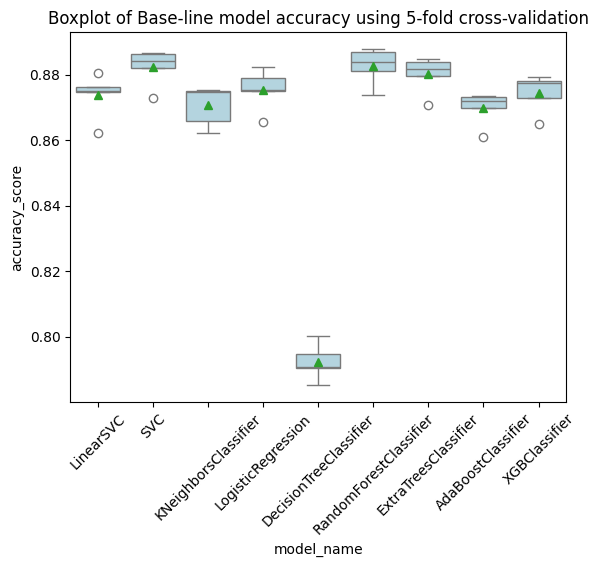

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.882697,0.005644
SVC,0.882378,0.005585
ExtraTreesClassifier,0.880140,0.005577
LogisticRegression,0.875506,0.006209
XGBClassifier,0.874547,0.005880
LinearSVC,0.873748,0.006796
KNeighborsClassifier,0.870658,0.006179
AdaBoostClassifier,0.869912,0.005221
DecisionTreeClassifier,0.792403,0.005563


In [26]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    #define k-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title('Boxplot of Base-line model accuracy using 5-fold cross-validation')
        plt.xticks(rotation=45)
        plt.show()
    
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    baseline_results.sort_values(by='Mean', ascending=False, inplace=True)
        
    return baseline_results
        
        
        
generate_baseline_results(models, X_pca, y, metrics='accuracy', cv=5, plot_results=True)